In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

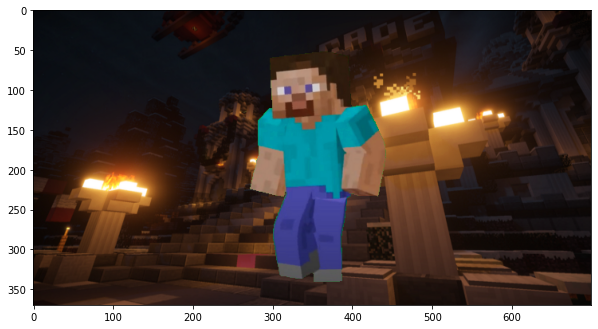

In [2]:
img = cv.imread(r'D:\DATASCIENCE\DeepLearning-DS\Chapter 03\OpenCV\personingreenmat.png')
rgb_h = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv_h = cv.cvtColor(rgb_h, cv.COLOR_RGB2HSV)

# masking the green screen in human pic
lower_bounds = (45, 100, 20)
upper_bounds = (72, 255, 255)

mask = cv.inRange(hsv_h, lower_bounds, upper_bounds)

masked_h = hsv_h.copy()
masked_h[mask!=0] = [0,0,0]

# adding mask to bg
bg = cv.imread(r'D:\DATASCIENCE\DeepLearning-DS\Chapter 03\OpenCV\bg.png')
rgb_bg = cv.cvtColor(bg, cv.COLOR_BGR2RGB)
rgb_bg = cv.resize(rgb_bg, (img.shape[1], img.shape[0]))
hsv_bg = cv.cvtColor(rgb_bg, cv.COLOR_RGB2HSV)
hsv_bg[mask == 0] = [0,0,0]

#getting full image
full_image = masked_h + hsv_bg
full_image = cv.cvtColor(full_image, cv.COLOR_HSV2RGB)

plt.figure(figsize=(10,15))
plt.imshow(full_image)
